In [ ]:
import pandas as pd
nba = pd.read_csv('/content/nba.csv')
missing_values = nba.isnull().sum()
print(missing_values)

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64


In [ ]:
# Drop the row with missing values across multiple columns
nba.dropna(how='all', inplace=True)

# Drop the 'College' column
nba.drop('College', axis=1, inplace=True)

# Impute missing 'Salary' values with the median
median_salary = nba['Salary'].median()
nba['Salary'].fillna(median_salary, inplace=True)

# Verify that there are no more missing values in the relevant columns
missing_values_after_cleaning = nba[['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight', 'Salary']].isnull().sum()
print("Missing values after cleaning:")
print(missing_values_after_cleaning)

Missing values after cleaning:
Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
Salary      0
dtype: int64


<ipython-input-4-1264300219>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba['Salary'].fillna(median_salary, inplace=True)


In [ ]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   Salary    457 non-null    float64
dtypes: float64(4), object(4)
memory usage: 32.1+ KB


In [ ]:
def convert_height_to_inches(height):
    if pd.isna(height):
        return np.nan
    feet, inches = map(int, height.split('-'))
    return feet * 12 + inches

nba['Height'] = nba['Height'].apply(convert_height_to_inches)
nba['Number'] = nba['Number'].astype(int)

nba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    int64  
 6   Weight    457 non-null    float64
 7   Salary    457 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 32.1+ KB


In [ ]:
# Check for duplicate rows
duplicates_before = nba.duplicated().sum()
print(f"Number of duplicate rows before removing: {duplicates_before}")

# Remove duplicate rows if they exist
if duplicates_before > 0:
    nba.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
duplicates_after = nba.duplicated().sum()
print(f"Number of duplicate rows after removing: {duplicates_after}")

Number of duplicate rows before removing: 0
Number of duplicate rows after removing: 0


In [ ]:
unique_teams = nba['Team'].unique()
unique_positions = nba['Position'].unique()

print("Unique Teams:")
print(unique_teams)

print("\nUnique Positions:")
print(unique_positions)

Unique Teams:
['Boston Celtics' 'Brooklyn Nets' 'New York Knicks' 'Philadelphia 76ers'
 'Toronto Raptors' 'Golden State Warriors' 'Los Angeles Clippers'
 'Los Angeles Lakers' 'Phoenix Suns' 'Sacramento Kings' 'Chicago Bulls'
 'Cleveland Cavaliers' 'Detroit Pistons' 'Indiana Pacers'
 'Milwaukee Bucks' 'Dallas Mavericks' 'Houston Rockets'
 'Memphis Grizzlies' 'New Orleans Pelicans' 'San Antonio Spurs'
 'Atlanta Hawks' 'Charlotte Hornets' 'Miami Heat' 'Orlando Magic'
 'Washington Wizards' 'Denver Nuggets' 'Minnesota Timberwolves'
 'Oklahoma City Thunder' 'Portland Trail Blazers' 'Utah Jazz']

Unique Positions:
['PG' 'SF' 'SG' 'PF' 'C']


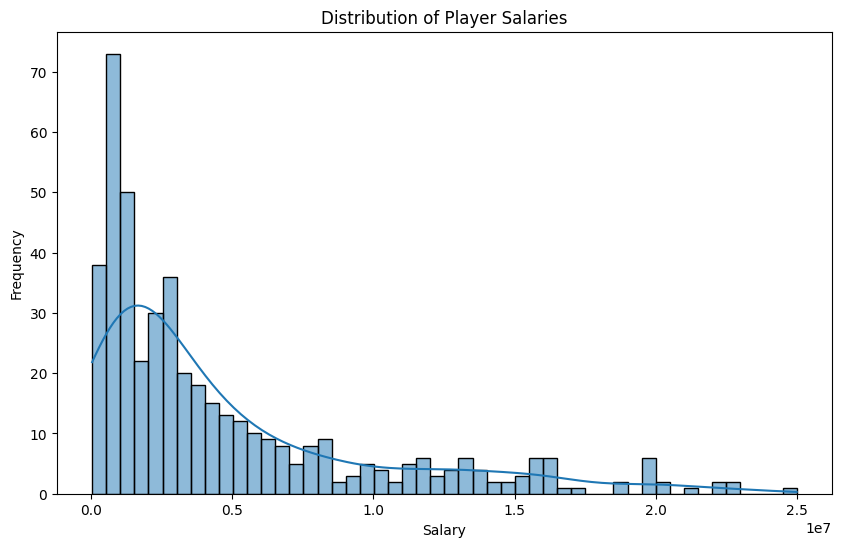

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=nba, x='Salary', bins=50, kde=True)
plt.title('Distribution of Player Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

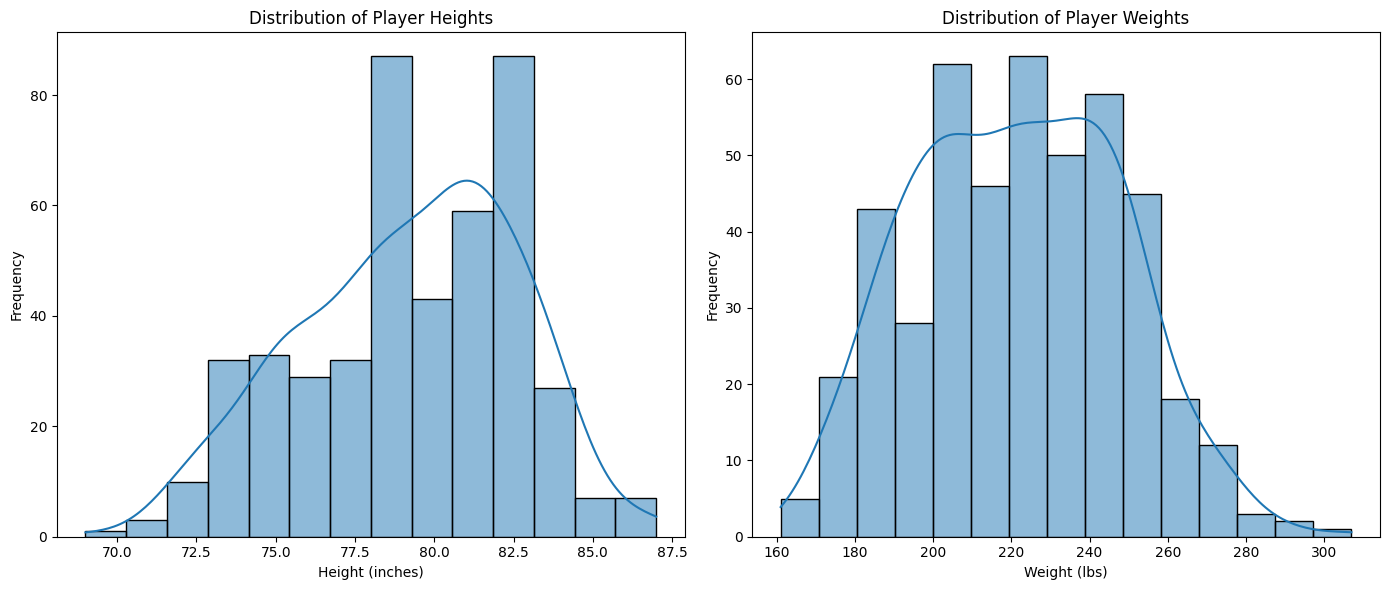

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=nba, x='Height', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Player Heights')
axes[0].set_xlabel('Height (inches)')
axes[0].set_ylabel('Frequency')

sns.histplot(data=nba, x='Weight', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Player Weights')
axes[1].set_xlabel('Weight (lbs)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

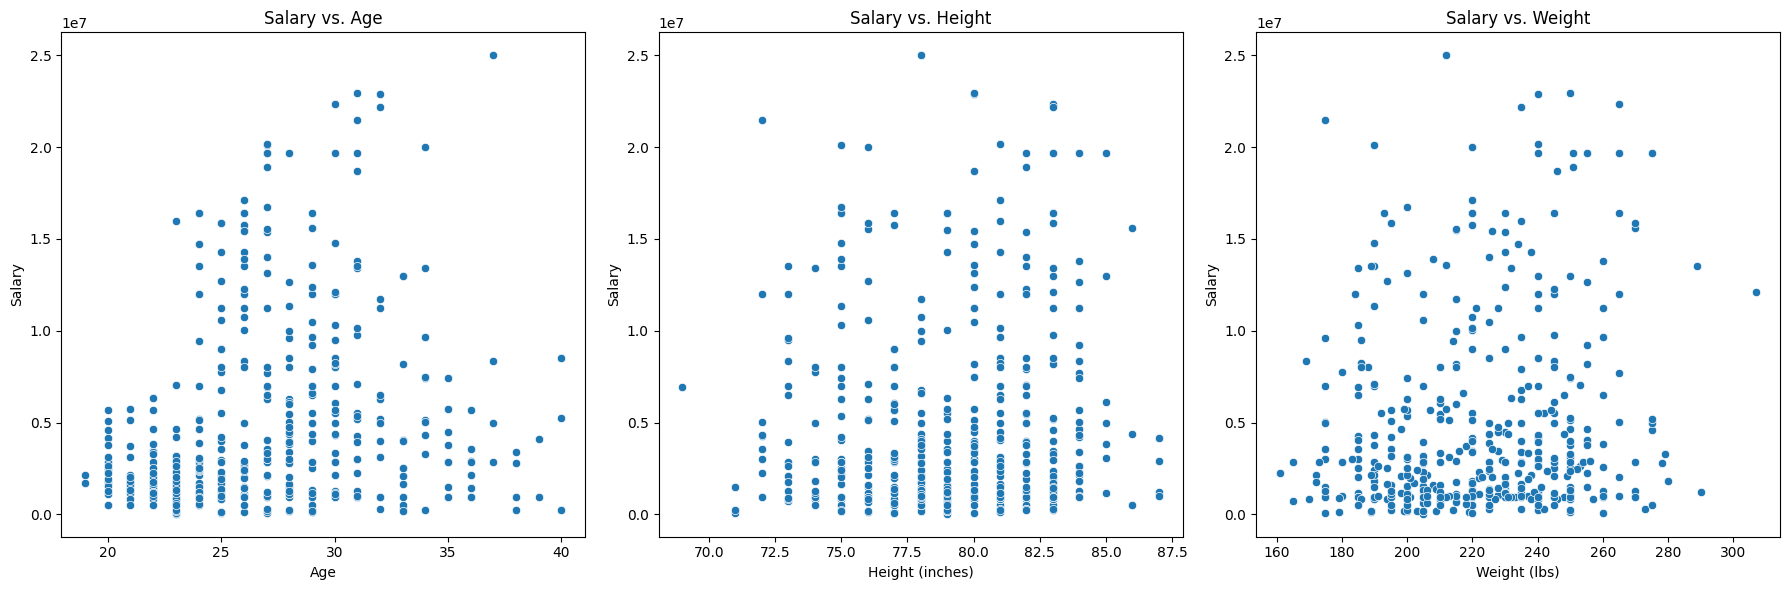

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=nba, x='Age', y='Salary', ax=axes[0])
axes[0].set_title('Salary vs. Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Salary')

sns.scatterplot(data=nba, x='Height', y='Salary', ax=axes[1])
axes[1].set_title('Salary vs. Height')
axes[1].set_xlabel('Height (inches)')
axes[1].set_ylabel('Salary')

sns.scatterplot(data=nba, x='Weight', y='Salary', ax=axes[2])
axes[2].set_title('Salary vs. Weight')
axes[2].set_xlabel('Weight (lbs)')
axes[2].set_ylabel('Salary')

plt.tight_layout()
plt.show()